<a href="https://colab.research.google.com/github/imdressel/project_gss17/blob/main/GSS_Isabella's_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Comparing marital status and meovrwrk

In [1]:
! git clone https://github.com/imdressel/project_gss17/

Cloning into 'project_gss17'...
remote: Enumerating objects: 210, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 210 (delta 23), reused 13 (delta 13), pack-reused 182
Receiving objects: 100% (210/210), 27.36 MiB | 21.60 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./project_gss17/gss_data_20182022_morevars.csv')
df2018 = df[df['year'] == 2018].copy() # to avoid warnings
df2022 = df[df['year'] == 2022].copy()

# clean variables as needed
meovrwrk = df['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df['meovrwrk'] = meovrwrk
marital = df['marital']
marital = marital.astype("string")
df['marital'] = marital

del marital
del meovrwrk

In [ ]:
# 2018
meovrwrk = df2018['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df2018['meovrwrk'] = meovrwrk
marital = df2018['marital']
marital = marital.astype("string")
df2018['marital'] = marital

del marital
del meovrwrk

In [ ]:
# 2022
meovrwrk = df2022['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df2022['meovrwrk'] = meovrwrk
marital = df2022['marital']
marital = marital.astype("string")
df2022['marital'] = marital

## Use grouped stacked histplots to look at relationship between marital status and meovrwrk

In [ ]:
df.head()

,year,id,marital,hrs1,conrinc,childs,meovrwrk,hlthdep
0,2018.0,1,never married,NaN,NaN,0.0,agree,NaN
1,2018.0,2,separated,NaN,NaN,3.0,<NA>,NaN
2,2018.0,3,married,40.0,70100.0,2.0,disagree,NaN
3,2018.0,4,married,40.0,84120.0,2.0,neither agree nor disagree,NaN
4,2018.0,5,divorced,NaN,NaN,0.0,<NA>,NaN


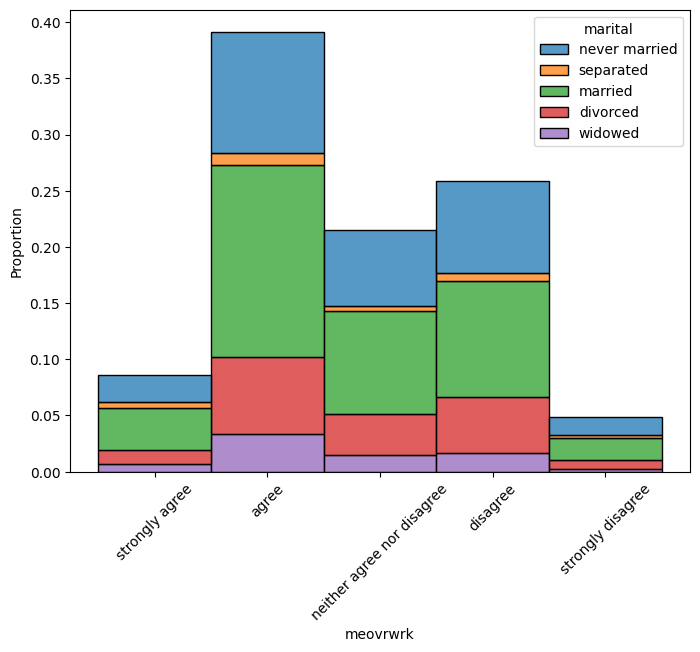

In [ ]:
## create grouped histplot
plt.figure(figsize=(8,6))
df['meovrwrk'] = pd.Categorical(df['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
sns.histplot(data=df,x=df['meovrwrk'],hue=df['marital'],stat='proportion',multiple='stack')
plt.xticks(rotation=45)
plt.title("meovrwrk by marital status")
plt.show()

#### for 2018 only

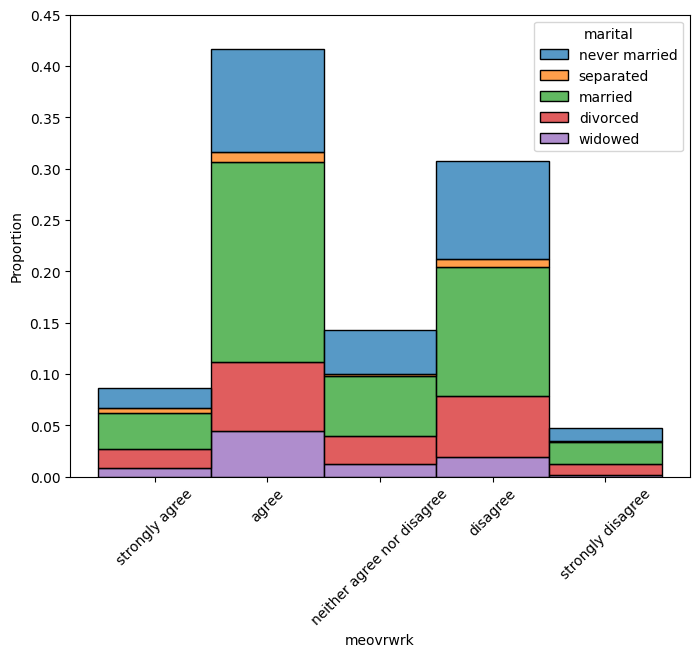

In [ ]:
plt.figure(figsize=(8,6))
horder = ['never married','separated','married','divorced','widowed']
# convert meovrwrk to ordered categorical
df2018['meovrwrk'] = pd.Categorical(df2018['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
sns.histplot(data=df2018,x=df2018['meovrwrk'],hue=df2018['marital'],stat='proportion',multiple='stack',hue_order=horder)
plt.ylim([0, 0.45])
plt.xticks(rotation=45)
plt.show()

#### for 2022 only

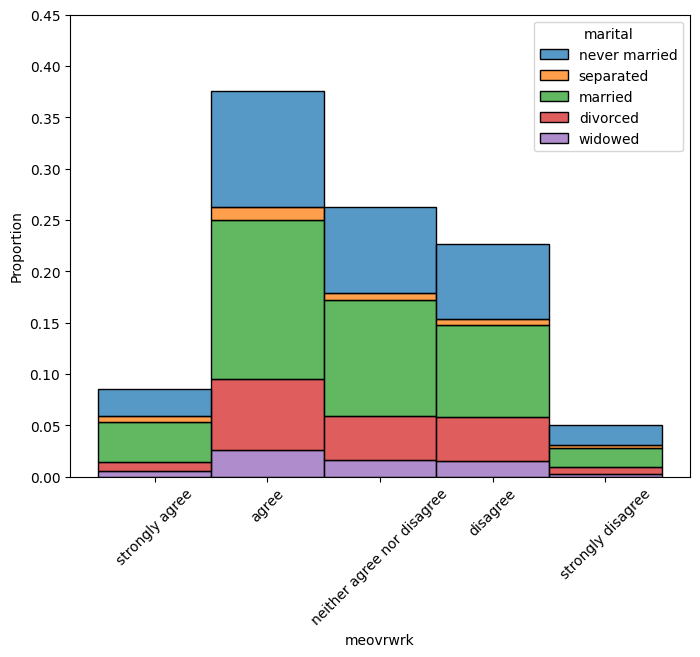

In [ ]:
plt.figure(figsize=(8,6))
df2022['meovrwrk'] = pd.Categorical(df2022['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
sns.histplot(data=df2022,x=df2022['meovrwrk'],hue=df2022['marital'],stat='proportion',multiple='stack',hue_order=horder)
plt.xticks(rotation=45)
plt.ylim([0, 0.45])
plt.show()

### explore married vs separated only and relationship with number of hours worked per week

(0.0, 100.0)

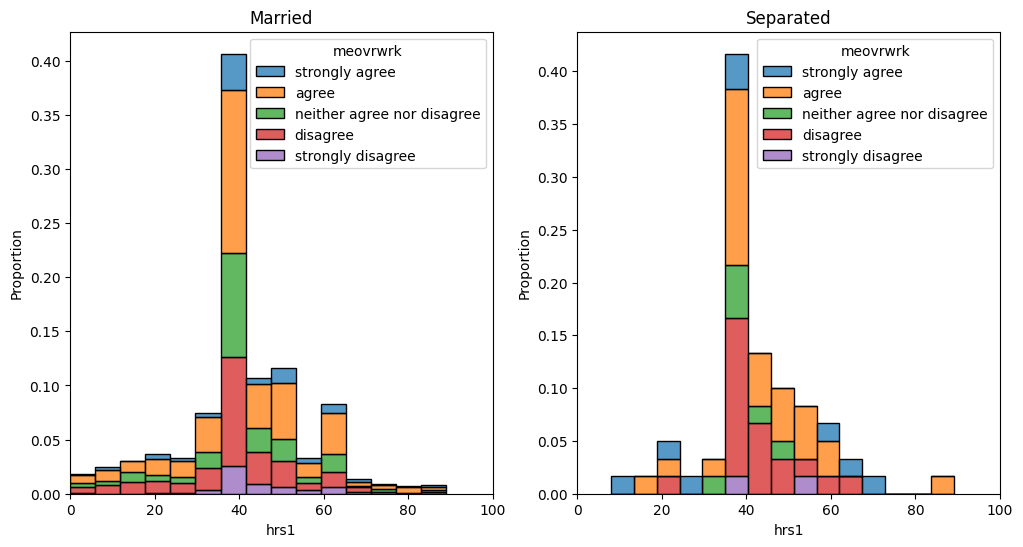

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Married
sns.histplot(data=df_married, x=df_married['hrs1'], hue=df_married['meovrwrk'],
             bins=15, stat='proportion', multiple='stack', ax=axes[0])
axes[0].set_title("Married")
axes[0].set_xlim([0, 100])

# Plot for Separated
sns.histplot(data=df_separated, x=df_separated['hrs1'], hue=df_separated['meovrwrk'],
             bins=15, stat='proportion', multiple='stack', ax=axes[1])
axes[1].set_title("Separated")
axes[1].set_xlim([0, 100])

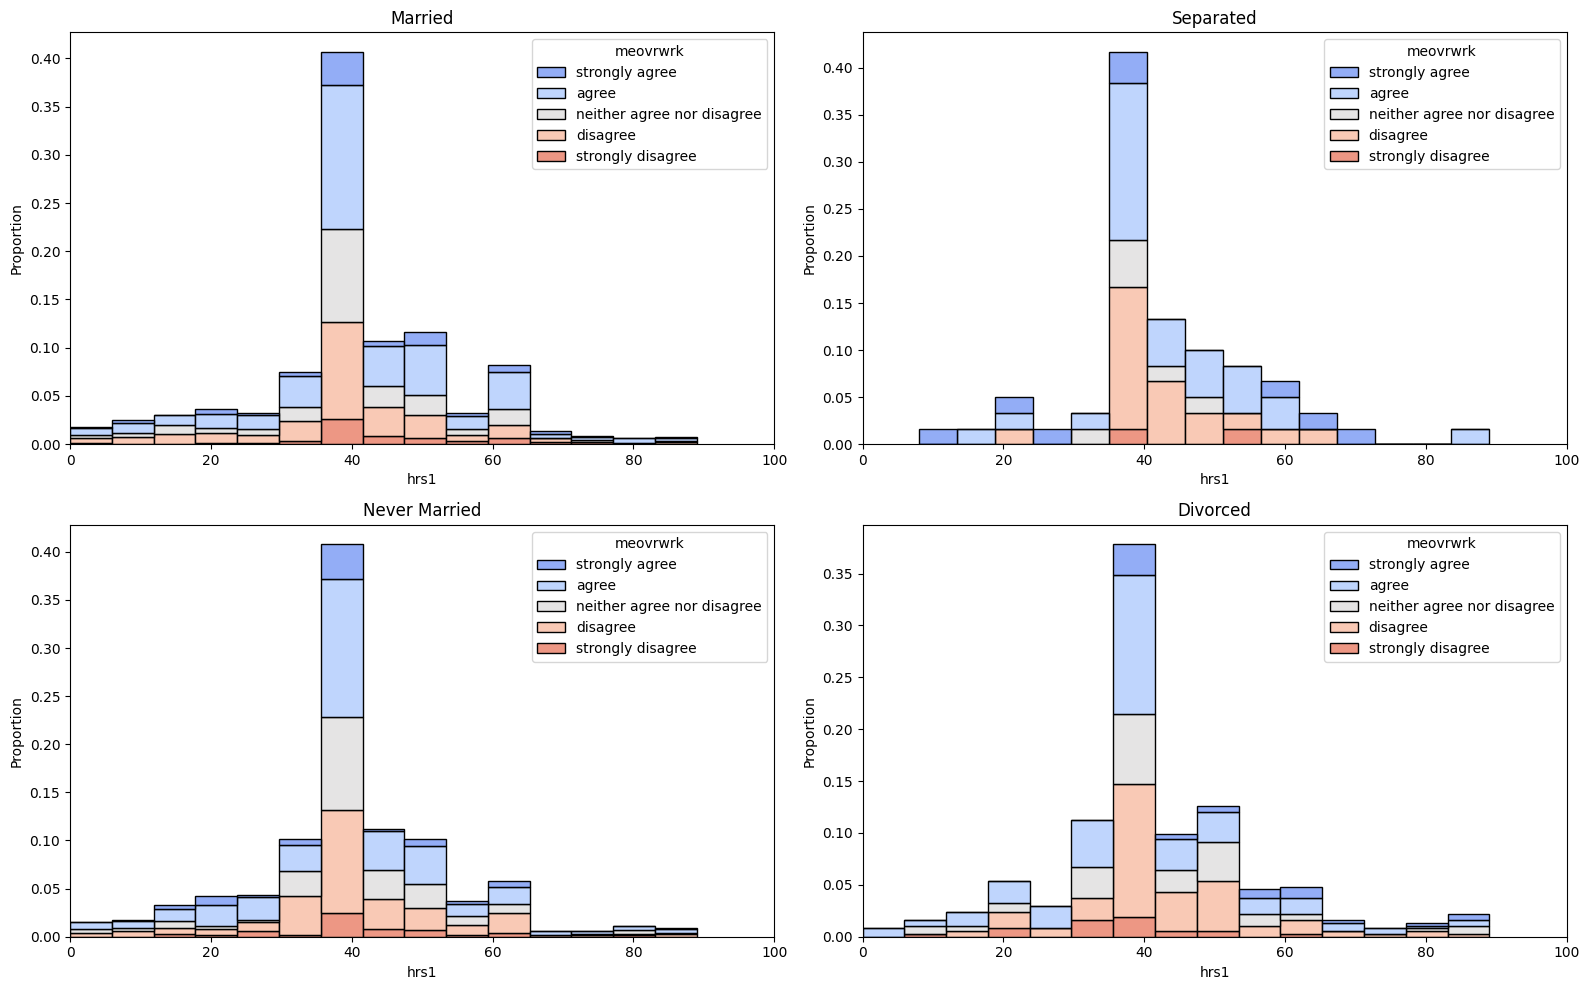

In [ ]:
df_married = df[df['marital']=="married"].copy()
df_married['meovrwrk'] = pd.Categorical(df_married['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
df_separated = df[df['marital']=="separated"].copy()
df_separated['meovrwrk'] = pd.Categorical(df_separated['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
df_nevermarried = df[df['marital']=="never married"].copy()
df_nevermarried['meovrwrk'] = pd.Categorical(df_nevermarried['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
df_divorced = df[df['marital']=="divorced"].copy()
df_divorced['meovrwrk'] = pd.Categorical(df_divorced['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)

fig, axes = plt.subplots(2, 2,figsize=(16,10))

sns.histplot(data=df_married, x=df_married['hrs1'], hue=df_married['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[0,0],palette ="coolwarm")
axes[0,0].set_title("Married")
axes[0,0].set_xlim([0, 100])

sns.histplot(data=df_separated, x=df_separated['hrs1'], hue=df_separated['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[0,1],palette ="coolwarm")
axes[0,1].set_title("Separated")
axes[0,1].set_xlim([0, 100])

sns.histplot(data=df_nevermarried, x=df_nevermarried['hrs1'], hue=df_nevermarried['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[1,0],palette ="coolwarm")
axes[1,0].set_title("Never Married")
axes[1,0].set_xlim([0, 100])

sns.histplot(data=df_divorced, x=df_divorced['hrs1'], hue=df_divorced['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[1,1],palette ="coolwarm")
axes[1,1].set_title("Divorced")
axes[1,1].set_xlim([0, 100])

plt.tight_layout()
plt.show()


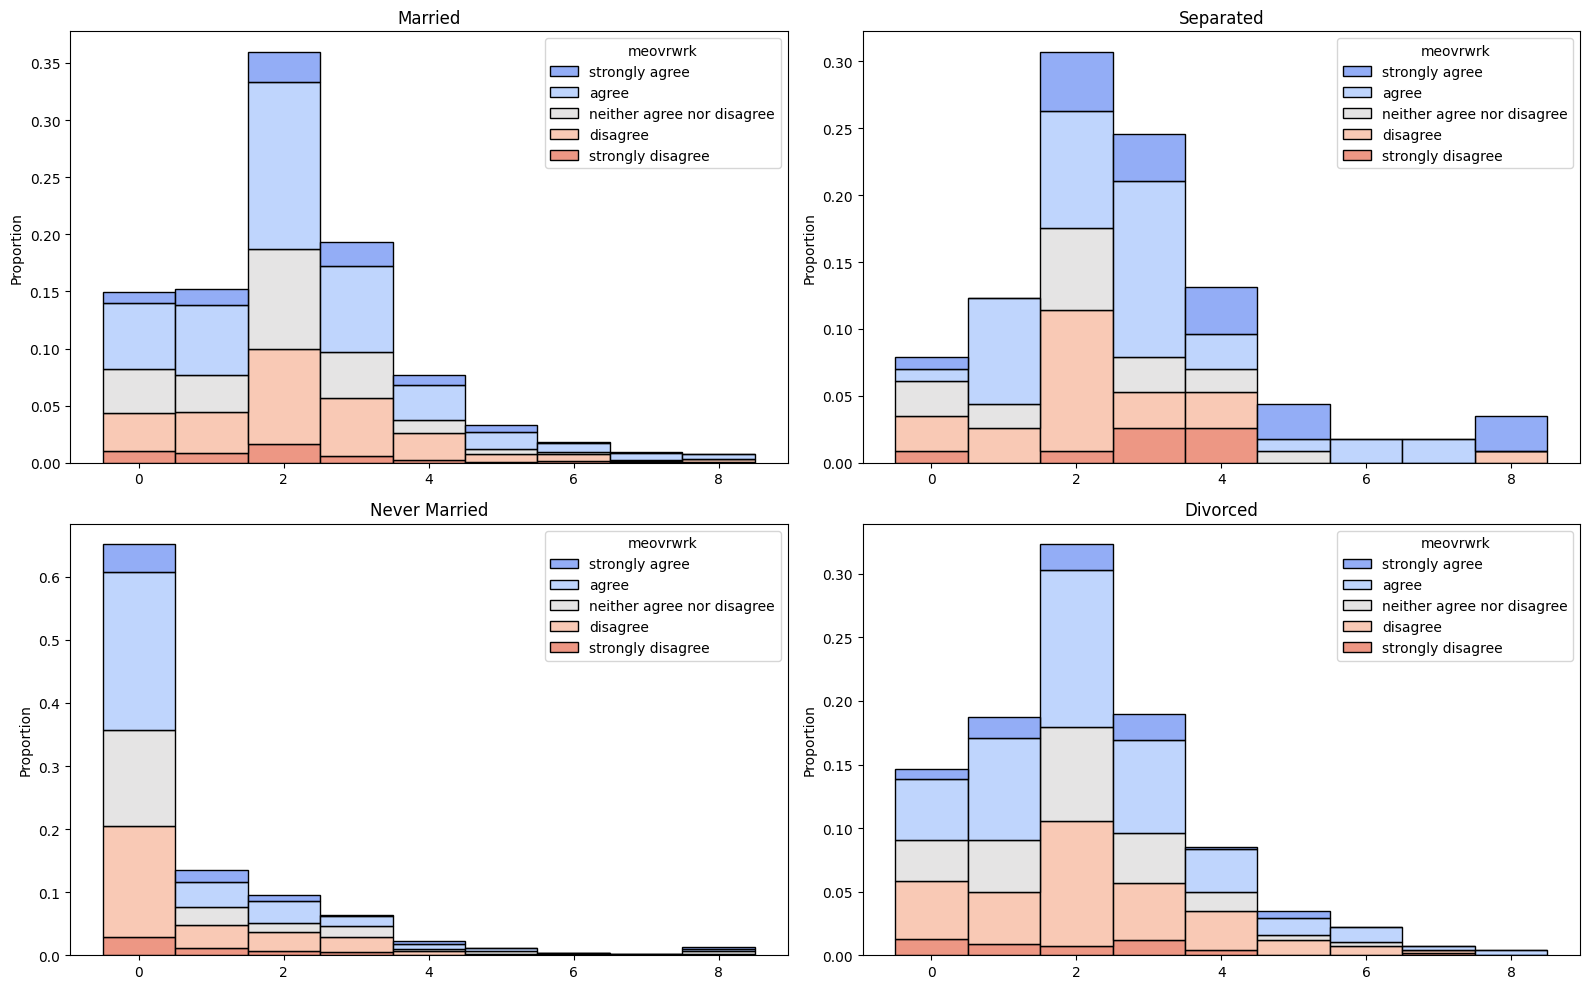

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(16,10))

sns.histplot(data=df_married, x=pd.Categorical(df_married['childs']), hue=df_married['meovrwrk'], stat='proportion', multiple='stack', ax=axes[0,0],palette ="coolwarm")
axes[0,0].set_title("Married")
# axes[0,0].set_xlim([0, 10])

sns.histplot(data=df_separated, x=pd.Categorical(df_separated['childs']), hue=df_separated['meovrwrk'], stat='proportion', multiple='stack', ax=axes[0,1],palette ="coolwarm")
axes[0,1].set_title("Separated")
# axes[0,1].set_xlim([0, 10])

sns.histplot(data=df_nevermarried, x=pd.Categorical(df_nevermarried['childs']), hue=df_nevermarried['meovrwrk'], stat='proportion', multiple='stack', ax=axes[1,0],palette ="coolwarm")
axes[1,0].set_title("Never Married")
# axes[1,0].set_xlim([0, 10])

sns.histplot(data=df_divorced, x=pd.Categorical(df_divorced['childs']), hue=df_divorced['meovrwrk'], stat='proportion', multiple='stack', ax=axes[1,1],palette ="coolwarm")
axes[1,1].set_title("Divorced")
# axes[1,1].set_xlim([0, 10])

plt.tight_layout()
plt.show()

- separated with more kids -> larger proportion of people agree than disagree, while for married and divorced are more evenly split
- difference between separated and divorced could be because separated people are in the process of getting a divorce and are more cognizant of factors, such as men overworking, that could be driving their separation and future divorce.

Compare relationship by sex

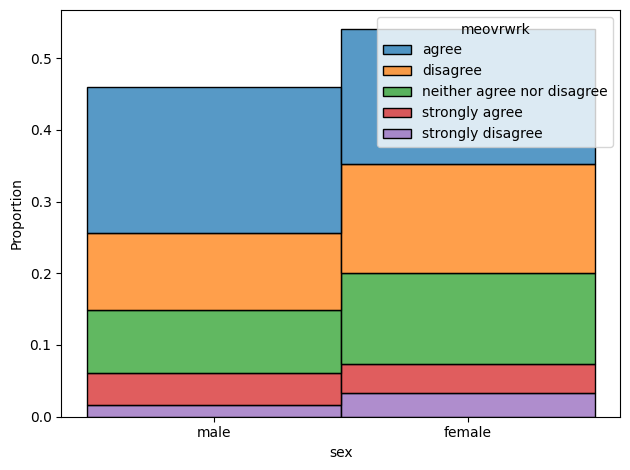

In [ ]:
sns.histplot(data=df, x=df['sex'], hue=df['meovrwrk'],
              stat='proportion', multiple='stack')
plt.tight_layout()

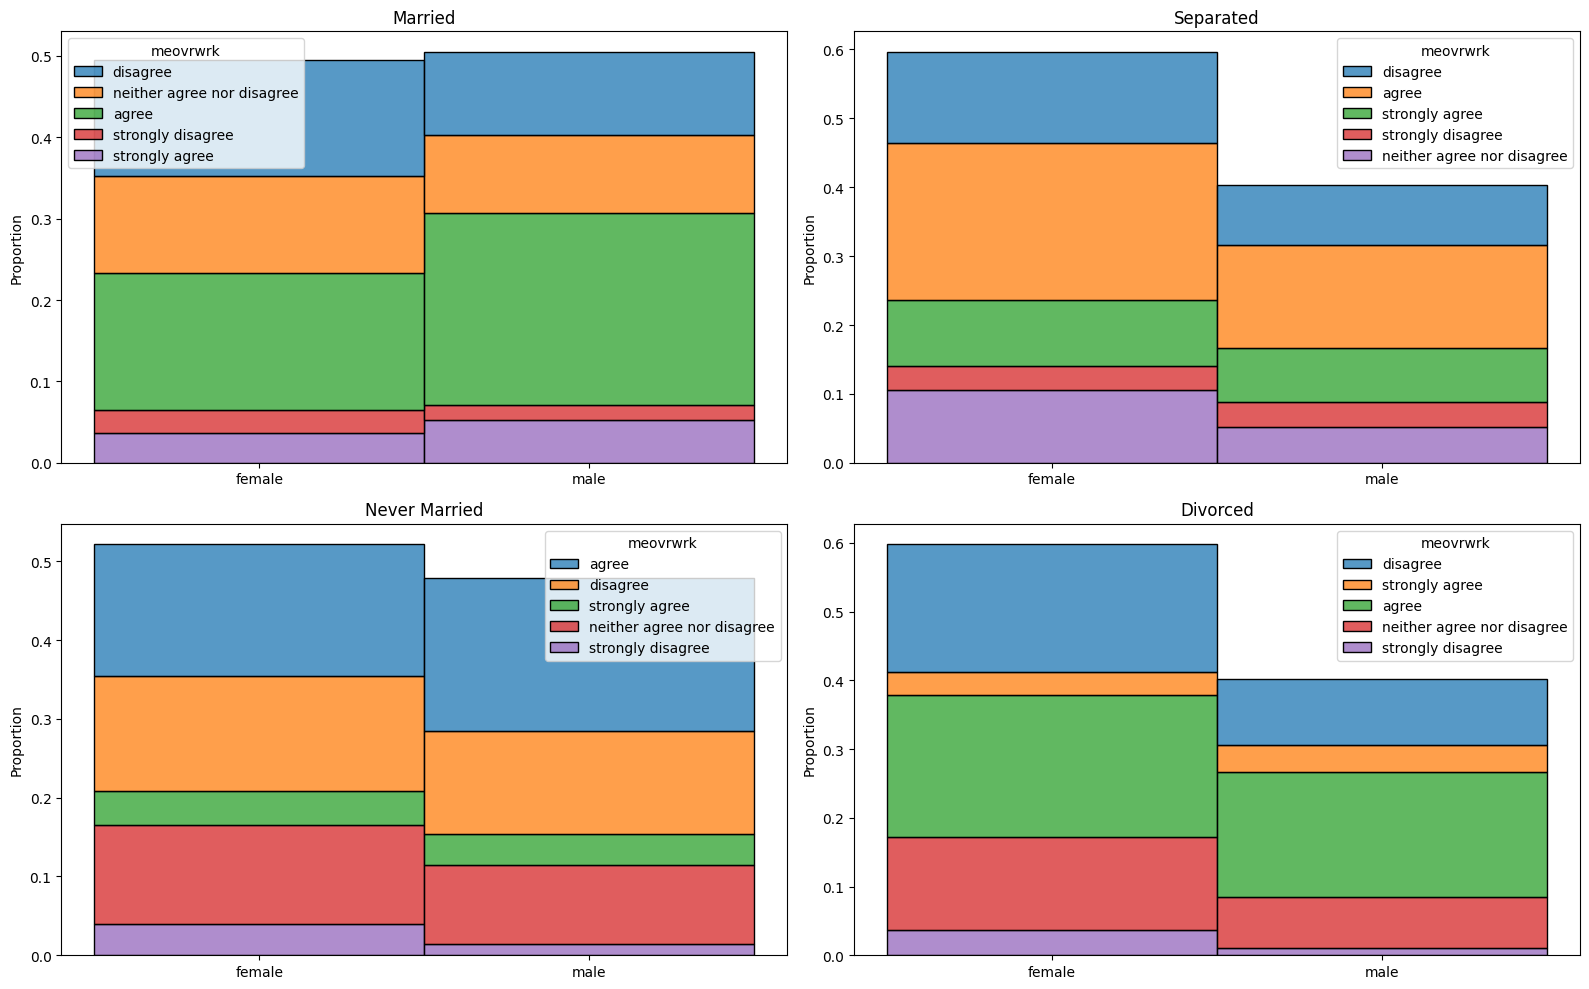

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(16,10))

sns.histplot(data=df_married, x=pd.Categorical(df_married['sex']), hue=df_married['meovrwrk'], stat='proportion', multiple='stack', ax=axes[0,0])
axes[0,0].set_title("Married")
# axes[0,0].set_xlim([0, 10])

sns.histplot(data=df_separated, x=pd.Categorical(df_separated['sex']), hue=df_separated['meovrwrk'], stat='proportion', multiple='stack', ax=axes[0,1])
axes[0,1].set_title("Separated")
# axes[0,1].set_xlim([0, 10])

sns.histplot(data=df_nevermarried, x=pd.Categorical(df_nevermarried['sex']), hue=df_nevermarried['meovrwrk'], stat='proportion', multiple='stack', ax=axes[1,0])
axes[1,0].set_title("Never Married")
# axes[1,0].set_xlim([0, 10])

sns.histplot(data=df_divorced, x=pd.Categorical(df_divorced['sex']), hue=df_divorced['meovrwrk'], stat='proportion', multiple='stack', ax=axes[1,1])
axes[1,1].set_title("Divorced")
# axes[1,1].set_xlim([0, 10])

plt.tight_layout()
plt.show()

#### explore relationship between meovrwrk and working hours

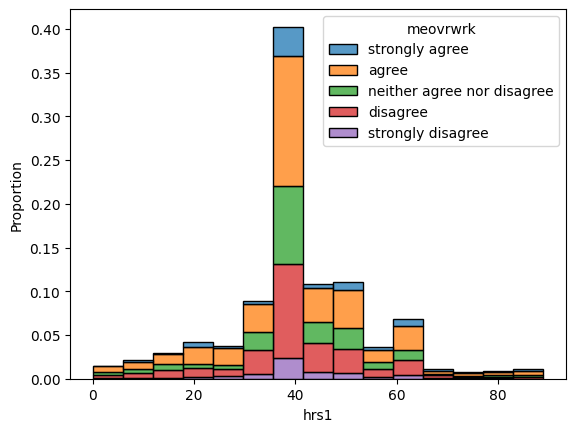

In [ ]:
sns.histplot(data=df,x=df['hrs1'],hue=df['meovrwrk'],bins=15,stat='proportion',multiple='stack')
plt.show()

In [ ]:
mean_hrs = df.groupby('meovrwrk')['hrs1'].mean()
mean_hrs

meovrwrk
strongly agree                43.413978
agree                         40.563446
neither agree nor disagree    40.788462
disagree                      40.334448
strongly disagree             41.530769
Name: hrs1, dtype: float64

### Explore relationship with the number of children

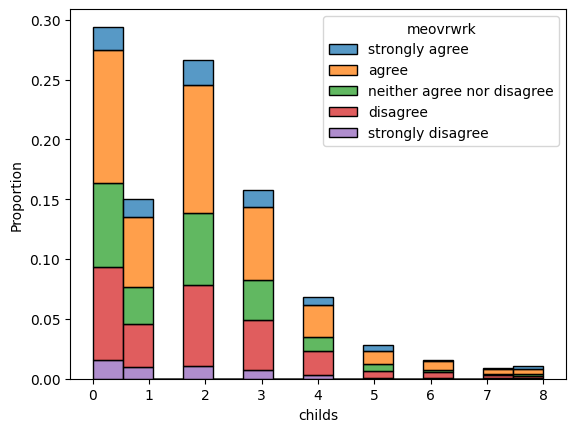

In [ ]:
sns.histplot(data=df,x=df['childs'],hue=df['meovrwrk'],bins=15,stat='proportion',multiple='stack')
plt.show()

#### Conclusions

Across all years:
*   The largest category across all survey respondents is "agree". The second largest category is "disagree". More survey respondents agree that family life suffers because men overwork than disagree. This is likely because women typically play a larger role
*   List item


### Create crosstabs for the different years

In [ ]:
# all years
pd.crosstab(df['marital'],df['meovrwrk'],margins=True,normalize=True)

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree,All
marital,,,,,,
divorced,0.012583,0.068824,0.036723,0.049563,0.008218,0.175912
married,0.037494,0.170776,0.091423,0.103493,0.019774,0.422958
never married,0.024140,0.107858,0.067540,0.082435,0.016436,0.298408
separated,0.005136,0.011043,0.004622,0.006677,0.002054,0.029533
widowed,0.006677,0.033128,0.014381,0.016692,0.002311,0.073190
All,0.086030,0.391628,0.214689,0.258860,0.048793,1.000000


In [ ]:
# 2018
pd.crosstab(df2018['marital'],df2018['meovrwrk'],margins=True,normalize=True)

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree,All
marital,,,,,,
divorced,0.018123,0.067961,0.027184,0.058900,0.010356,0.182524
married,0.035599,0.194822,0.058252,0.125566,0.021359,0.435599
never married,0.020065,0.099676,0.042718,0.095793,0.012298,0.270550
separated,0.004531,0.009709,0.001942,0.007767,0.001294,0.025243
widowed,0.008414,0.044013,0.012298,0.019417,0.001942,0.086084
All,0.086731,0.416181,0.142395,0.307443,0.047249,1.000000


In [ ]:
# 2022
pd.crosstab(df2022['marital'],df2022['meovrwrk'],margins=True,normalize=True)

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree,All
marital,,,,,,
divorced,0.008940,0.069391,0.042997,0.043423,0.006811,0.171562
married,0.038740,0.154960,0.113240,0.088974,0.018731,0.414645
never married,0.026820,0.113240,0.083865,0.073648,0.019157,0.316731
separated,0.005534,0.011920,0.006386,0.005960,0.002554,0.032354
widowed,0.005534,0.025968,0.015751,0.014900,0.002554,0.064708
All,0.085568,0.375479,0.262239,0.226905,0.049808,1.000000


# Cleaned part for what we are actually doing!

In [32]:
df = pd.read_csv('./project_gss17/gss_data_20182022.csv')
df2018 = df[df['year'] == 2018].copy() # to avoid warnings
df2022 = df[df['year'] == 2022].copy()

# clean variables as needed
meovrwrk = df['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df['meovrwrk'] = meovrwrk
df['meovrwrk'] = pd.Categorical(df['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
marital = df['marital']
marital = marital.astype("string")
df['marital'] = marital
df['marital'] = pd.Categorical(df['marital'],categories=["never married","married","separated","divorced","widowed"],ordered=True)
# 2018
meovrwrk = df2018['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df2018['meovrwrk'] = meovrwrk
df2018['meovrwrk'] = pd.Categorical(df2018['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
marital = df2018['marital']
marital = marital.astype("string")
df2018['marital'] = marital
df2018['marital'] = pd.Categorical(df2018['marital'],categories=["never married","married","separated","divorced","widowed"],ordered=True)
# 2022
meovrwrk = df2022['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df2022['meovrwrk'] = meovrwrk
df2022['meovrwrk'] = pd.Categorical(df2022['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
marital = df2022['marital']
marital = marital.astype("string")
df2022['marital'] = marital
df2022['marital'] = marital
df2022['marital'] = pd.Categorical(df2022['marital'],categories=["never married","married","separated","divorced","widowed"],ordered=True)

## 1. Histplots: Compare relationship between marital status and meovrwrk in 2018 and 2022

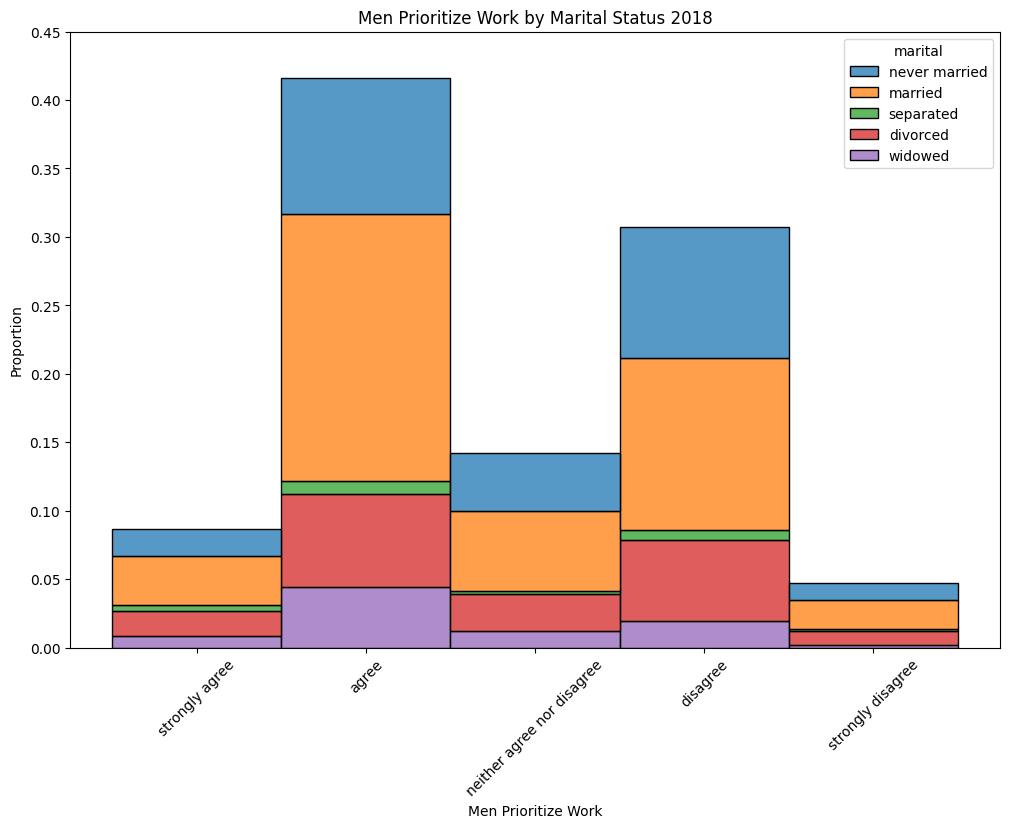

In [34]:
plt.figure(figsize=(12,8))
ax=sns.histplot(data=df2018,x=df2018['meovrwrk'],hue=df2018['marital'],stat='proportion',multiple='stack')
plt.ylim([0, 0.45])
plt.xticks(rotation=45)
plt.title("Men Prioritize Work by Marital Status 2018")
plt.xlabel("Men Prioritize Work")
plt.show()

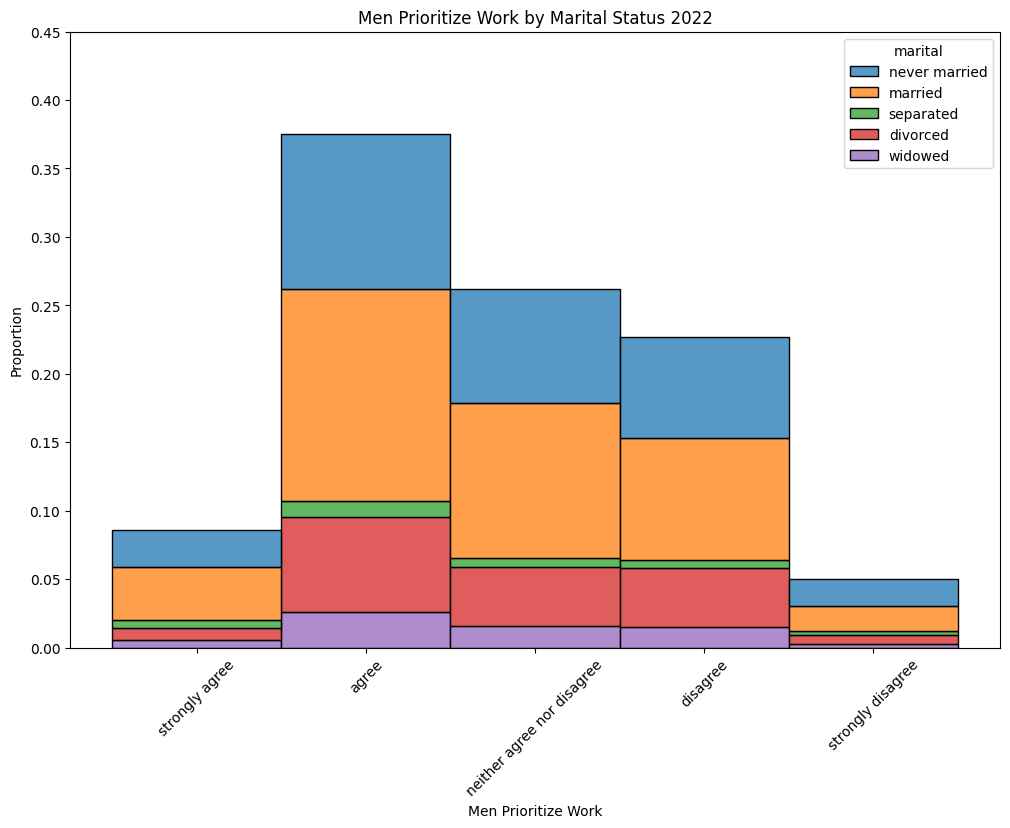

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(data=df2022,x=df2022['meovrwrk'],hue=df2022['marital'],stat='proportion',multiple='stack')
plt.xticks(rotation=45)
plt.title("Men Prioritize Work by Marital Status 2022")
plt.xlabel("Men Prioritize Work")
plt.ylim([0, 0.45])
plt.show()

Histplot findings:
1.   In 2018, the categories with the highest proportions are "agree" and "disagree". The proportion of marital status type for each opinion on men prioritizing work appears visually similar.
2.   In 2022, there was a decrease in the total proportion of respondents who agree or disagree with the statement that men prioritize work and an increase in the total proportion of respondents who neither agree nor disagree compared to 2018. This could be due to increased uncertainty in all aspects of life after the pandemic. Opinions may have changed after lockdown and remote work.
3.   The crosstab shows the numeric values in the histplot.


Below shows the proportion of values in each group, normalized by the total amount in each category for men prioritize work

In [36]:
pd.crosstab(df['marital'],df['meovrwrk'],margins=True,normalize='index') # normalize each row

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree
marital,,,,,
never married,0.080895,0.361446,0.226334,0.276248,0.055077
married,0.088646,0.403764,0.216151,0.244687,0.046752
separated,0.173913,0.373913,0.156522,0.226087,0.069565
divorced,0.071533,0.391241,0.208759,0.281752,0.046715
widowed,0.091228,0.452632,0.196491,0.228070,0.031579
All,0.086030,0.391628,0.214689,0.258860,0.048793


Among people who are separated, 17% of respondents strongly agree that men prioritize work, causing family life to suffer. This is the largest proportion of respondents who strongly agree out of all marital status categories. This may be due to separated couples dealing with very significant and potentially recent marriage tensions, causing them to be separated but not yet divorced.

In [37]:
pd.crosstab(df2018['marital'],df2018['meovrwrk'],margins=True,normalize='index')

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree
marital,,,,,
never married,0.074163,0.368421,0.157895,0.354067,0.045455
married,0.081724,0.447251,0.133730,0.288262,0.049034
separated,0.179487,0.384615,0.076923,0.307692,0.051282
divorced,0.099291,0.372340,0.148936,0.322695,0.056738
widowed,0.097744,0.511278,0.142857,0.225564,0.022556
All,0.086731,0.416181,0.142395,0.307443,0.047249


In [38]:
pd.crosstab(df2022['marital'],df2022['meovrwrk'],margins=True,normalize='index')

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree
marital,,,,,
never married,0.084677,0.357527,0.264785,0.232527,0.060484
married,0.093429,0.373717,0.273101,0.214579,0.045175
separated,0.171053,0.368421,0.197368,0.184211,0.078947
divorced,0.052109,0.404467,0.250620,0.253102,0.039702
widowed,0.085526,0.401316,0.243421,0.230263,0.039474
All,0.085568,0.375479,0.262239,0.226905,0.049808


In the married marital status category, the proportion of respondents who agree that men prioritize work decreased after COVID-19 (0.48 in 2018, 0.37 in 2022). This may be due to a majority of individuals working remotely during COVID, causing a shift in perceptions on whether men prioritize work excessively.

# 2. Histplots by marital status of hours worked per week colored by meovrwrk

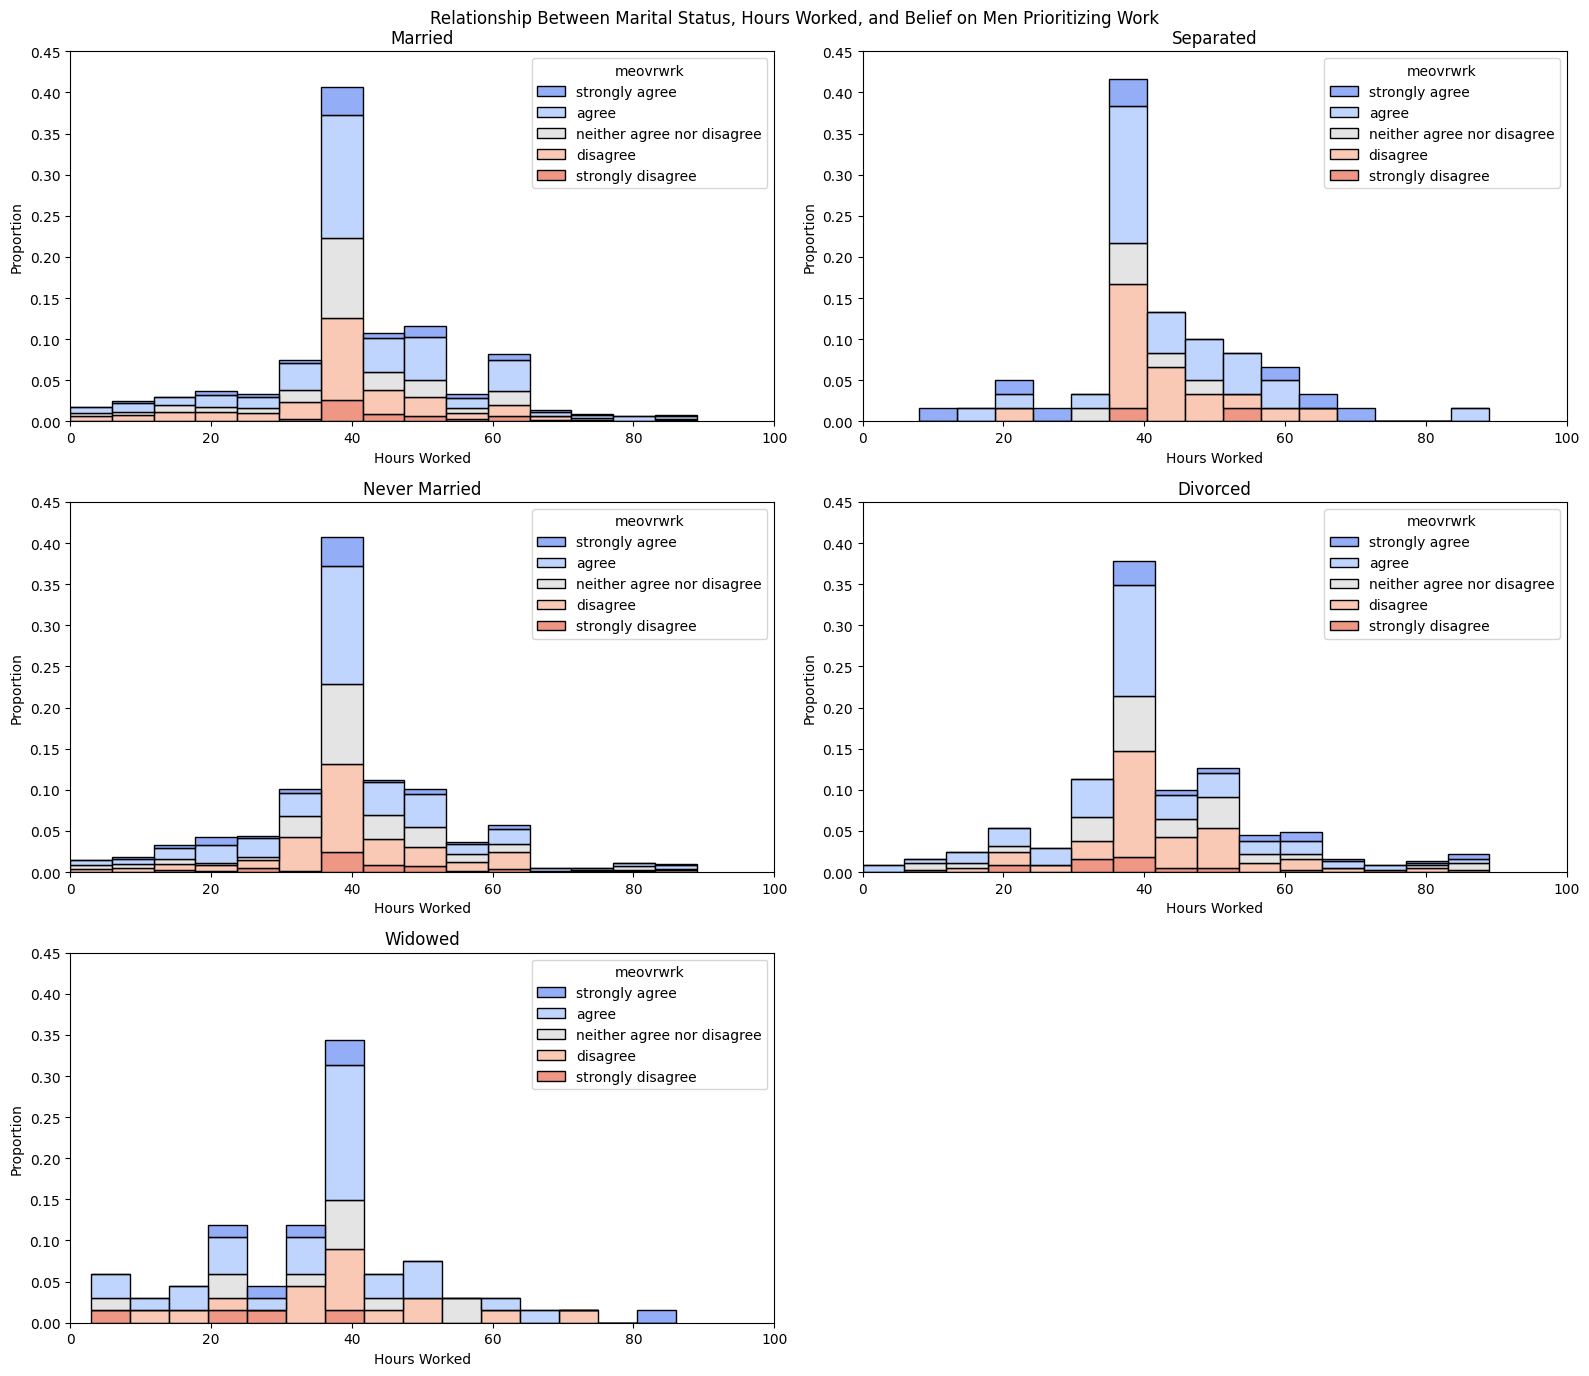

In [66]:
df_married = df[df['marital']=="married"].copy()
df_separated = df[df['marital']=="separated"].copy()
df_nevermarried = df[df['marital']=="never married"].copy()
df_divorced = df[df['marital']=="divorced"].copy()
df_widowed = df[df['marital']=="widowed"].copy()

fig, axes = plt.subplots(3, 2, figsize=(16,14))

sns.histplot(data=df_married, x=df_married['hrs1'], hue=df_married['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[0,0],palette ="coolwarm")
axes[0,0].set_title("Married")
axes[0,0].set_xlim([0, 100])
axes[0,0].set_ylim([0, 0.45])
axes[0,0].set_xlabel("Hours Worked")

sns.histplot(data=df_separated, x=df_separated['hrs1'], hue=df_separated['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[0,1],palette ="coolwarm")
axes[0,1].set_title("Separated")
axes[0,1].set_xlim([0, 100])
axes[0,1].set_ylim([0, 0.45])
axes[0,1].set_xlabel("Hours Worked")

sns.histplot(data=df_nevermarried, x=df_nevermarried['hrs1'], hue=df_nevermarried['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[1,0],palette ="coolwarm")
axes[1,0].set_title("Never Married")
axes[1,0].set_xlim([0, 100])
axes[1,0].set_ylim([0, 0.45])
axes[1,0].set_xlabel("Hours Worked")

sns.histplot(data=df_divorced, x=df_divorced['hrs1'], hue=df_divorced['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[1,1],palette ="coolwarm")
axes[1,1].set_title("Divorced")
axes[1,1].set_xlim([0, 100])
axes[1,1].set_ylim([0, 0.45])
axes[1,1].set_xlabel("Hours Worked")

sns.histplot(data=df_widowed, x=df_widowed['hrs1'], hue=df_widowed['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[2,0],palette ="coolwarm")
axes[2,0].set_title("Widowed")
axes[2,0].set_xlim([0, 100])
axes[2,0].set_ylim([0, 0.45])
axes[2,0].set_xlabel("Hours Worked")

fig.delaxes(axes[2, 1])

plt.suptitle("Relationship Between Marital Status, Hours Worked, and Belief on Men Prioritizing Work")
plt.tight_layout()
plt.show()

Histplot findings:
*   A greater portion of respondents in the separated marital status category who work very high or low working hours are in agreement with the statement that family life suffers because men concentrate too much on their work compared to other marital status categories.
*  For all marital status categories except for widowed, respondents who work around 40 hours per week have similar frequencies of agreement and disagreement with the statement that family life suffers because men prioritize work. For widowed respondents, there is a greater tendency toward agreement than respondents in the other marital status categories.
*   In general for most marital status categories, respondents with working hours close to the mean have similar beliefs of agreement vs disagreement.





# 3. Histplots by marital status of number of children colored by meovrwrk

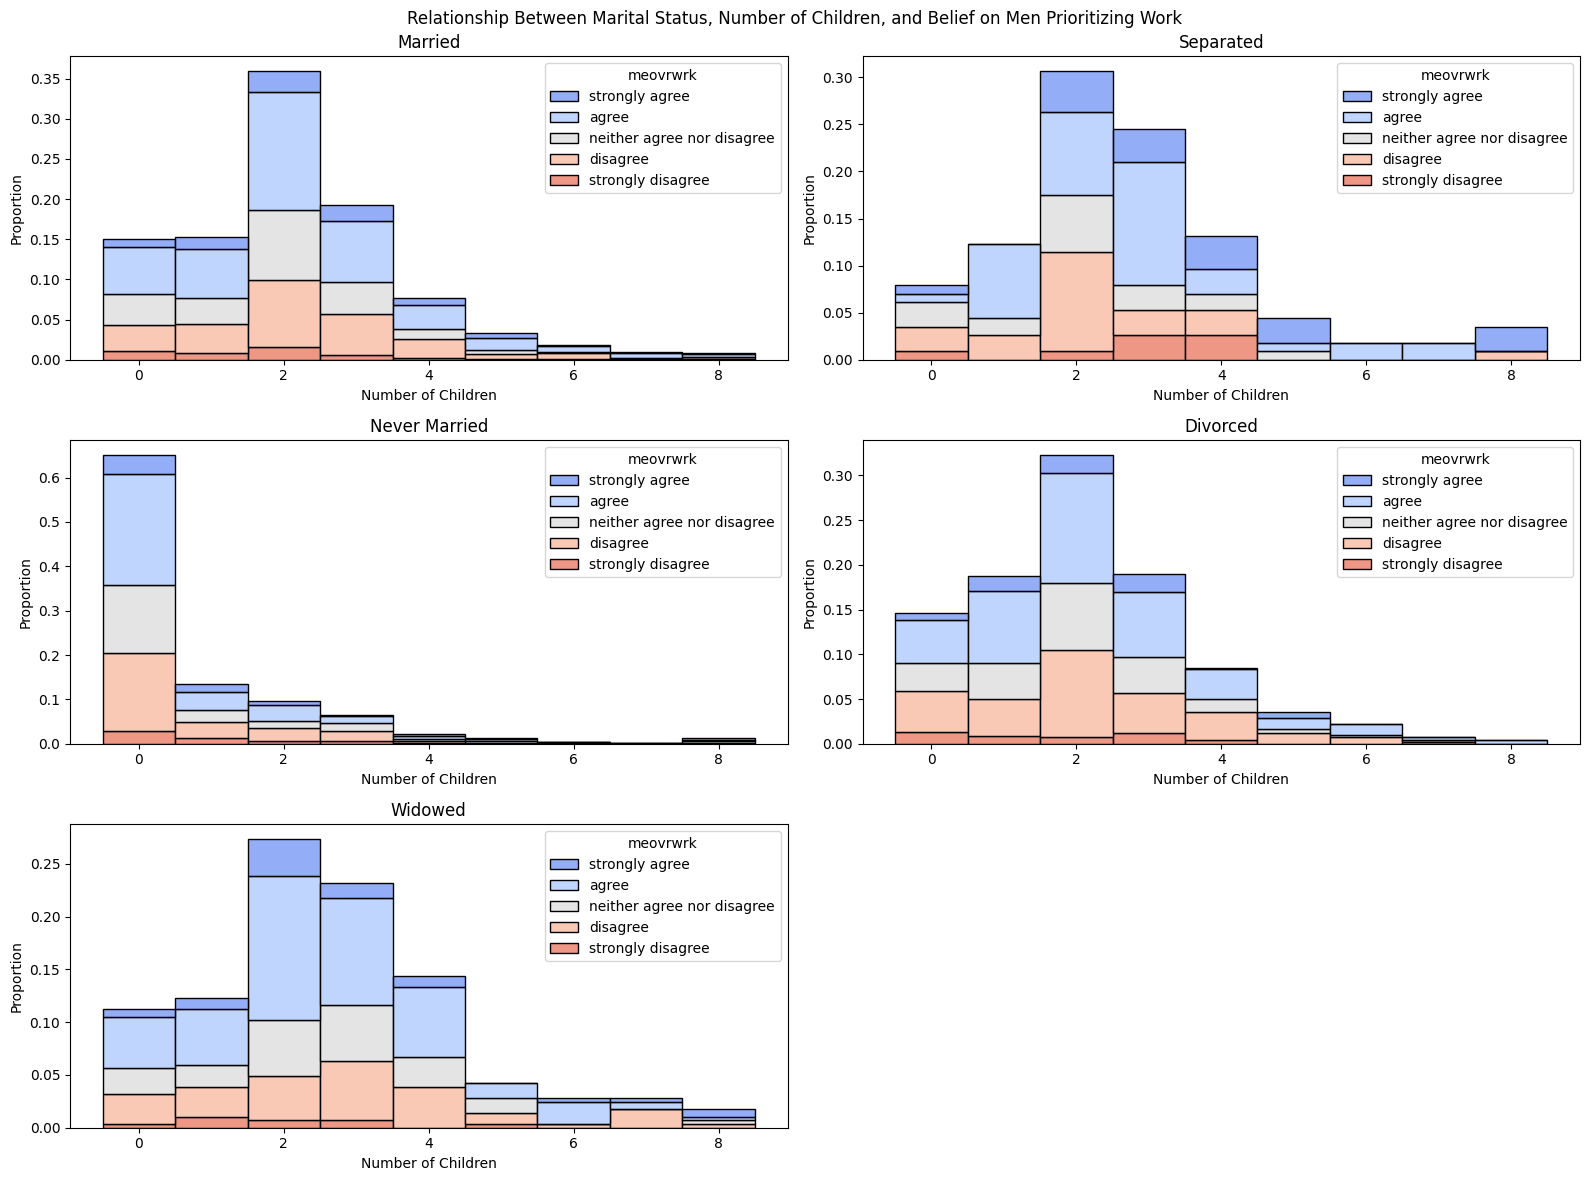

In [64]:
fig, axes = plt.subplots(3, 2, figsize=(16,12))

sns.histplot(data=df_married, x=pd.Categorical(df_married['childs']), hue=df_married['meovrwrk'], stat='proportion', multiple='stack', ax=axes[0,0],palette ="coolwarm")
axes[0,0].set_title("Married")
axes[0,0].set_xlabel("Number of Children")

sns.histplot(data=df_separated, x=pd.Categorical(df_separated['childs']), hue=df_separated['meovrwrk'], stat='proportion', multiple='stack', ax=axes[0,1],palette ="coolwarm")
axes[0,1].set_title("Separated")
axes[0,1].set_xlabel("Number of Children")

sns.histplot(data=df_nevermarried, x=pd.Categorical(df_nevermarried['childs']), hue=df_nevermarried['meovrwrk'], stat='proportion', multiple='stack', ax=axes[1,0],palette ="coolwarm")
axes[1,0].set_title("Never Married")
axes[1,0].set_xlabel("Number of Children")

sns.histplot(data=df_divorced, x=pd.Categorical(df_divorced['childs']), hue=df_divorced['meovrwrk'], stat='proportion', multiple='stack', ax=axes[1,1],palette ="coolwarm")
axes[1,1].set_title("Divorced")
axes[1,1].set_xlabel("Number of Children")

sns.histplot(data=df_widowed, x=pd.Categorical(df_widowed['childs']), hue=df_widowed['meovrwrk'], stat='proportion', multiple='stack', ax=axes[2,0],palette ="coolwarm")
axes[2,0].set_title("Widowed")
axes[2,0].set_xlabel("Number of Children")

fig.delaxes(axes[2, 1])

plt.suptitle("Relationship Between Marital Status, Number of Children, and Belief on Men Prioritizing Work")
plt.tight_layout()
plt.show()

*   For the separated category with greater than 4 kids, there is a much larger portion of respondents who strongly agree/agree than strongly disagree/disagree compared to the other marital status categories. This could be due to the sample size or due to additional stressors among separated coupled with many kids.
*   Across all marital status groups, beliefs about men prioritizing work are more evenly split for respondents with fewer children. For respondents with more children, (>4 or >6), there tends to be more variability in beliefs. In general, there is a tendency toward agreement with the statement that men prioritizing work leads to the family life suffering. This is potentially caused by the immense amount of work and expenses required to raise a large family, requiring more responsibilities for both partners. In addition, respondents with more children (>4) appear less likely to select "neither agree nor disagree" compared to respondents with fewer children.



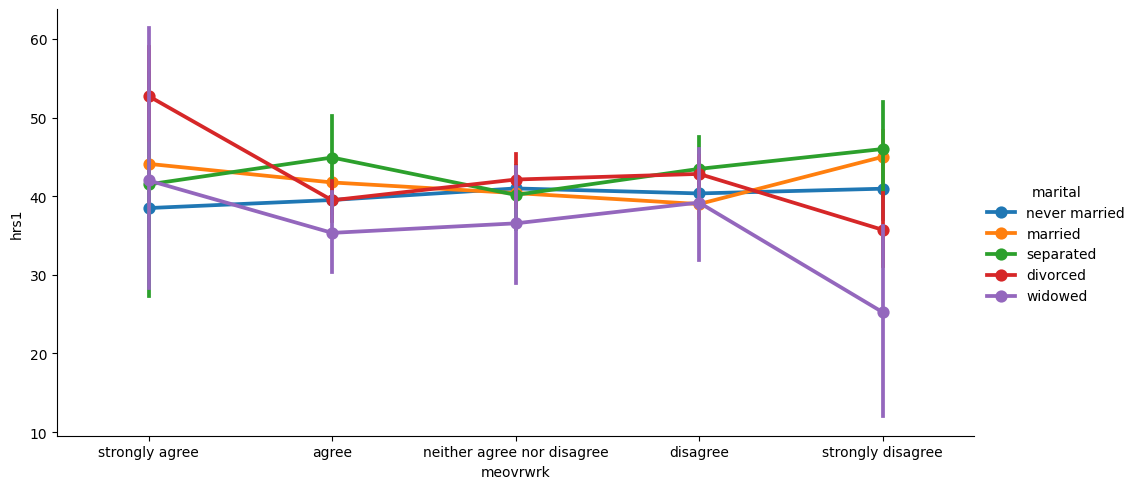

In [86]:
sns.catplot(
    data=df, x="meovrwrk", y="hrs1", hue="marital",
    kind="point",aspect=2
)

Just in case we want a different kind of plot lol

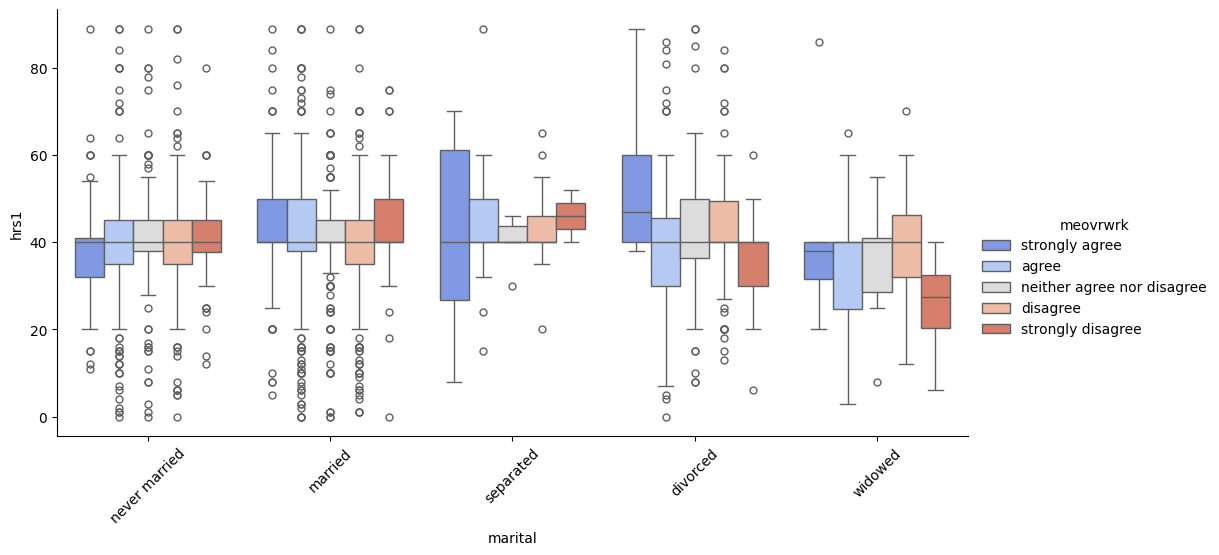

In [87]:
g=sns.catplot(
    data=df, x="marital", y="hrs1", hue="meovrwrk",
    kind="box", height=5, aspect=2, palette ="coolwarm"
)
g.set_xticklabels(rotation=45)